<a href="https://colab.research.google.com/github/huntermitchell123/misc/blob/master/AgePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

In [2]:
!gdown https://drive.google.com/uc?id=0BxYys69jI14kRjNmM0gyVWM2bHM

Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kRjNmM0gyVWM2bHM
To: /content/crop_part1.tar.gz
45.4MB [00:00, 124MB/s] 


In [3]:
!tar -xf /content/crop_part1.tar.gz

In [175]:
import os
import numpy as np
import cv2
import tensorflow as tf


In [176]:
PATH = '/content/crop_part1'

In [178]:
paths = os.listdir(PATH)

In [179]:
len(paths)

9780

In [180]:
labels = np.array([ float(path.split('_')[0]) for path in paths])

In [181]:
labels[0]

21.0

In [182]:
def format_image(path):
  img = cv2.imread(PATH + '/' + path)
  img = cv2.resize(img,(128,128))
  return img

In [184]:
data = np.array([format_image(path) for path in paths])

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
train_x,test_x,train_y,test_y = train_test_split(data,labels,test_size=0.2)

In [187]:
from tensorflow.keras.applications import MobileNet

In [188]:
import  tensorflow.keras.layers as L


In [189]:
model = tf.keras.Sequential([
                  MobileNet(input_shape=(128,128,3),
                            include_top=False,
                            pooling='avg',
                            weights='imagenet'),
                             L.Dense(1)
])

In [190]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 1024)              3228864   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 1025      
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [191]:
model.compile(optimizer='adam',loss='mae',metrics='mae')

In [193]:
?model.fit()


In [194]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=4,
    validation_data=(x_test,y_test)
)

Epoch 1/4
123/123 [==============================] - 21s 155ms/step - loss: 13.3345 - mae: 13.3345 - val_loss: 11.7446 - val_mae: 11.7446
Epoch 2/4
123/123 [==============================] - 19s 152ms/step - loss: 5.3221 - mae: 5.3221 - val_loss: 10.9096 - val_mae: 10.9096
Epoch 3/4
123/123 [==============================] - 19s 151ms/step - loss: 4.6463 - mae: 4.6463 - val_loss: 5.3069 - val_mae: 5.3069
Epoch 4/4
123/123 [==============================] - 19s 152ms/step - loss: 4.1083 - mae: 4.1083 - val_loss: 5.0364 - val_mae: 5.0364


In [200]:
test_pic = cv2.imread('/content/LinkedInPic.jpg')

In [201]:
test_pic = cv2.resize(test_pic,(128,128))

In [198]:
from google.colab.patches import cv2_imshow

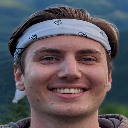

In [202]:
cv2_imshow(test_pic)

In [204]:
test_pic = test_pic.reshape((1,128,128,3))

In [205]:
pred = model.predict(test_pic)

In [206]:
pred

array([[25.026966]], dtype=float32)